In [1]:
#Initializing
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
import statsmodels.formula.api as smf
import math

# Cleaning Data

In [2]:
# Import the raw data.
df = pd.read_excel('/Users/Kevin/Files/Thinkful/Data Files/NY_2014.xls', skiprows = 4)

In [3]:
df.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
0,Adams Village,1851.0,0.0,0.0,NaN,0.0,0.0,0.0,11.0,1.0,10.0,0.0,0.0
1,Addison Town and Village,2568.0,2.0,0.0,NaN,0.0,1.0,1.0,49.0,1.0,47.0,1.0,0.0
2,Afton Village4,820.0,0.0,0.0,0.0,NaN,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,Akron Village,2842.0,1.0,0.0,NaN,0.0,0.0,1.0,17.0,0.0,17.0,0.0,0.0
4,Albany4,98595.0,802.0,8.0,54.0,NaN,237.0,503.0,3888.0,683.0,3083.0,122.0,12.0


In [4]:
#stripping column names of spaces to be referenced
df.columns.str.strip()

Index(['City', 'Population', 'Violent\ncrime',
       'Murder and\nnonnegligent\nmanslaughter',
       'Rape\n(revised\ndefinition)1', 'Rape\n(legacy\ndefinition)2',
       'Robbery', 'Aggravated\nassault', 'Property\ncrime', 'Burglary',
       'Larceny-\ntheft', 'Motor\nvehicle\ntheft', 'Arson3'],
      dtype='object')

In [5]:
#renaming columns to avoid /n in name
df.columns = ['City', 'Population', 'Violent Crime',
       'Murder and Nonnegligent Manslaughter',
       'Rape (revised definition)1', 'Rape (legacy definition)2',
       'Robbery', 'Aggravated Assault', 'Property Crime', 'Burglary',
       'Larceny-Theft', 'Motor Vehicle Theft', 'Arson3']

In [6]:
#Robbery column is 'non-null object type' need to change into float type later to conditionally evaluate. 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 376 entries, 0 to 375
Data columns (total 13 columns):
City                                    375 non-null object
Population                              369 non-null float64
Violent Crime                           369 non-null float64
Murder and Nonnegligent Manslaughter    369 non-null float64
Rape (revised definition)1              227 non-null float64
Rape (legacy definition)2               142 non-null float64
Robbery                                 369 non-null float64
Aggravated Assault                      369 non-null float64
Property Crime                          368 non-null float64
Burglary                                369 non-null float64
Larceny-Theft                           368 non-null float64
Motor Vehicle Theft                     369 non-null float64
Arson3                                  365 non-null float64
dtypes: float64(12), object(1)
memory usage: 38.3+ KB


In [7]:
#creating murder feature
df['Murder'] = np.where(df['Murder and Nonnegligent Manslaughter'] > 0, 1, 0)

In [8]:
#creating robbery feature
df['Robbery_2'] = np.where(df['Robbery'] > 0, 1, 0)

In [9]:
df.isna().sum()

City                                      1
Population                                7
Violent Crime                             7
Murder and Nonnegligent Manslaughter      7
Rape (revised definition)1              149
Rape (legacy definition)2               234
Robbery                                   7
Aggravated Assault                        7
Property Crime                            8
Burglary                                  7
Larceny-Theft                             8
Motor Vehicle Theft                       7
Arson3                                   11
Murder                                    0
Robbery_2                                 0
dtype: int64

In [10]:
df = df.dropna(subset=['Property Crime'])

In [11]:
df.isna().sum()

City                                      0
Population                                0
Violent Crime                             0
Murder and Nonnegligent Manslaughter      0
Rape (revised definition)1              142
Rape (legacy definition)2               226
Robbery                                   0
Aggravated Assault                        0
Property Crime                            0
Burglary                                  0
Larceny-Theft                             0
Motor Vehicle Theft                       0
Arson3                                    4
Murder                                    0
Robbery_2                                 0
dtype: int64

In [12]:
# Identifying Outlier
df.nlargest(5, ['Robbery'])

,City,Population,Violent Crime,Murder and Nonnegligent Manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated Assault,Property Crime,Burglary,Larceny-Theft,Motor Vehicle Theft,Arson3,Murder,Robbery_2
227,New York4,8473938.0,50564.0,333.0,2190.0,NaN,16581.0,31460.0,135747.0,15916.0,112107.0,7724.0,NaN,1,1
38,Buffalo4,258419.0,3174.0,60.0,174.0,NaN,1277.0,1663.0,12449.0,3119.0,8362.0,968.0,NaN,1,1
283,Rochester4,210347.0,1765.0,27.0,190.0,NaN,698.0,850.0,8856.0,2125.0,6058.0,673.0,135.0,1,1
326,Syracuse4,144534.0,1164.0,20.0,70.0,NaN,406.0,668.0,5755.0,1404.0,3986.0,365.0,57.0,1,1
366,Yonkers4,200624.0,974.0,3.0,33.0,NaN,358.0,580.0,2009.0,414.0,1395.0,200.0,15.0,1,1


In [13]:
#dropping NYC
df = df.drop(df.index[227])

In [14]:
# Check
df.nlargest(5, ['Robbery'])

,City,Population,Violent Crime,Murder and Nonnegligent Manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated Assault,Property Crime,Burglary,Larceny-Theft,Motor Vehicle Theft,Arson3,Murder,Robbery_2
38,Buffalo4,258419.0,3174.0,60.0,174.0,NaN,1277.0,1663.0,12449.0,3119.0,8362.0,968.0,NaN,1,1
283,Rochester4,210347.0,1765.0,27.0,190.0,NaN,698.0,850.0,8856.0,2125.0,6058.0,673.0,135.0,1,1
326,Syracuse4,144534.0,1164.0,20.0,70.0,NaN,406.0,668.0,5755.0,1404.0,3986.0,365.0,57.0,1,1
366,Yonkers4,200624.0,974.0,3.0,33.0,NaN,358.0,580.0,2009.0,414.0,1395.0,200.0,15.0,1,1
147,Hempstead Village,55722.0,477.0,8.0,NaN,0.0,248.0,221.0,965.0,201.0,607.0,157.0,3.0,1,1


# Using Previous Model to Test with 2014 Data and Looking at the Residuals

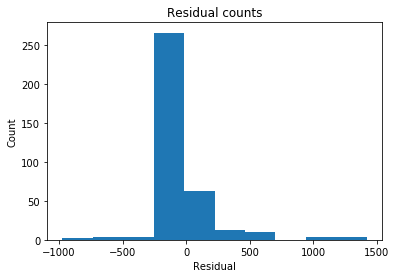

In [15]:
predicted = -7.80310548 * df['Robbery'] + 2.37737708 * df['Burglary'] + 4.80898749 * df['Violent Crime'] + 107.46986505
actual = df['Property Crime']

# Calculate the error, also called the residual.
residual = actual - predicted

plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

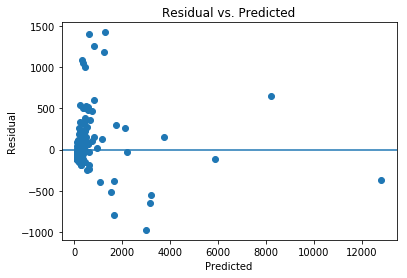

In [16]:
#Residual Plot
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

# Second Attempt at Creating Model Using 2013 Data

In [30]:
# Import the raw data.
df = pd.read_csv('/Users/Kevin/Files/Thinkful/Data Files/NEW_YORK-Offenses_Known_to_Law_Enforcement_by_City_2013 - 13tbl8ny.csv', skiprows = 4)

In [31]:
#stripping column names of spaces to be referenced
df.columns.str.strip()

Index(['City', 'Population', 'Violent\ncrime',
       'Murder and\nnonnegligent\nmanslaughter',
       'Rape\n(revised\ndefinition)1', 'Rape\n(legacy\ndefinition)2',
       'Robbery', 'Aggravated\nassault', 'Property\ncrime', 'Burglary',
       'Larceny-\ntheft', 'Motor\nvehicle\ntheft', 'Arson3'],
      dtype='object')

In [32]:
#renaming columns to avoid /n in name
df.columns = ['City', 'Population', 'Violent Crime',
       'Murder and Nonnegligent Manslaughter',
       'Rape (revised definition)1', 'Rape (legacy definition)2',
       'Robbery', 'Aggravated Assault', 'Property Crime', 'Burglary',
       'Larceny-Theft', 'Motor Vehicle Theft', 'Arson3']

In [33]:
#Robbery column is 'non-null object type' need to change into float type later to conditionally evaluate. 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 13 columns):
City                                    351 non-null object
Population                              348 non-null object
Violent Crime                           348 non-null object
Murder and Nonnegligent Manslaughter    348 non-null float64
Rape (revised definition)1              0 non-null float64
Rape (legacy definition)2               348 non-null object
Robbery                                 348 non-null object
Aggravated Assault                      348 non-null object
Property Crime                          348 non-null object
Burglary                                348 non-null object
Larceny-Theft                           348 non-null object
Motor Vehicle Theft                     348 non-null object
Arson3                                  187 non-null float64
dtypes: float64(3), object(10)
memory usage: 35.7+ KB


In [34]:
# Removing commas and changing column type to float
df['Population'] = df['Population'].str.replace(',', '')
df['Population'] = df['Population'].replace('',np.nan).astype(float)

df['Robbery'] = df['Robbery'].str.replace(',', '')
df['Robbery'] = df['Robbery'].replace('',np.nan).astype(float)

df['Property Crime'] = df['Property Crime'].str.replace(',', '')
df['Property Crime'] = df['Property Crime'].replace('',np.nan).astype(float)

df['Violent Crime'] = df['Violent Crime'].str.replace(',', '')
df['Violent Crime'] = df['Violent Crime'].replace('',np.nan).astype(float)

df['Rape (legacy definition)2'] = df['Rape (legacy definition)2'].str.replace(',', '')
df['Rape (legacy definition)2'] = df['Rape (legacy definition)2'].replace('',np.nan).astype(float)

df['Aggravated Assault'] = df['Aggravated Assault'].str.replace(',', '')
df['Aggravated Assault'] = df['Aggravated Assault'].replace('',np.nan).astype(float)

df['Burglary'] = df['Burglary'].str.replace(',', '')
df['Burglary'] = df['Burglary'].replace('',np.nan).astype(float)

df['Larceny-Theft'] = df['Larceny-Theft'].str.replace(',', '')
df['Larceny-Theft'] = df['Larceny-Theft'].replace('',np.nan).astype(float)

df['Motor Vehicle Theft'] = df['Motor Vehicle Theft'].str.replace(',', '')
df['Motor Vehicle Theft'] = df['Motor Vehicle Theft'].replace('',np.nan).astype(float)

In [35]:
#creating murder feature
df['Murder'] = np.where(df['Murder and Nonnegligent Manslaughter'] > 0, 1, 0)

In [36]:
#creating robbery feature
df['Robbery_2'] = np.where(df['Robbery'] > 0, 1, 0)

In [37]:
df.isna().sum()

City                                      0
Population                                3
Violent Crime                             3
Murder and Nonnegligent Manslaughter      3
Rape (revised definition)1              351
Rape (legacy definition)2                 3
Robbery                                   3
Aggravated Assault                        3
Property Crime                            3
Burglary                                  3
Larceny-Theft                             3
Motor Vehicle Theft                       3
Arson3                                  164
Murder                                    0
Robbery_2                                 0
dtype: int64

In [38]:
df = df.dropna(subset=['Property Crime'])

In [39]:
df.isna().sum()

City                                      0
Population                                0
Violent Crime                             0
Murder and Nonnegligent Manslaughter      0
Rape (revised definition)1              348
Rape (legacy definition)2                 0
Robbery                                   0
Aggravated Assault                        0
Property Crime                            0
Burglary                                  0
Larceny-Theft                             0
Motor Vehicle Theft                       0
Arson3                                  161
Murder                                    0
Robbery_2                                 0
dtype: int64

In [40]:
# Transforming feature by square rooting values.  

sr_pop = [math.sqrt(x) for x in df['Population']]
sr_vc = [math.sqrt(x) for x in df['Violent Crime']]                           
sr_mnm = [math.sqrt(x) for x in df['Murder and Nonnegligent Manslaughter']]
sr_rp = [math.sqrt(x) for x in df['Rape (legacy definition)2']]     
sr_rb = [math.sqrt(x) for x in df['Robbery']]              
sr_aa = [math.sqrt(x) for x in df['Aggravated Assault']]
sr_pc = [math.sqrt(x) for x in df['Property Crime']]                       
sr_b = [math.sqrt(x) for x in df['Burglary']]                           
sr_lt = [math.sqrt(x) for x in df['Larceny-Theft']]
sr_mvt = [math.sqrt(x) for x in df['Motor Vehicle Theft']]
                             
df['Sqrt pop'] = sr_pop
df['Sqrt vc'] = sr_vc
df['Sqrt mnm'] = sr_mnm
df['Sqrt rp'] = sr_rp
df['Sqrt rb'] = sr_rb
df['Sqrt aa'] = sr_aa
df['Sqrt pc'] = sr_pc
df['Sqrt b'] = sr_b
df['Sqrt lt'] = sr_lt
df['Sqrt mvt'] = sr_mvt

In [41]:
df.head()

,City,Population,Violent Crime,Murder and Nonnegligent Manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated Assault,Property Crime,Burglary,...,Sqrt pop,Sqrt vc,Sqrt mnm,Sqrt rp,Sqrt rb,Sqrt aa,Sqrt pc,Sqrt b,Sqrt lt,Sqrt mvt
0,Adams Village,1861.0,0.0,0.0,NaN,0.0,0.0,0.0,12.0,2.0,...,43.139309,0.000000,0.000000,0.000000,0.000000,0.000000,3.464102,1.414214,3.162278,0.000000
1,Addison Town and Village,2577.0,3.0,0.0,NaN,0.0,0.0,3.0,24.0,3.0,...,50.764161,1.732051,0.000000,0.000000,0.000000,1.732051,4.898979,1.732051,4.472136,1.000000
2,Akron Village,2846.0,3.0,0.0,NaN,0.0,0.0,3.0,16.0,1.0,...,53.347915,1.732051,0.000000,0.000000,0.000000,1.732051,4.000000,1.000000,3.872983,0.000000
3,Albany,97956.0,791.0,8.0,NaN,30.0,227.0,526.0,4090.0,705.0,...,312.979233,28.124722,2.828427,5.477226,15.066519,22.934690,63.953108,26.551836,56.947344,11.916375
4,Albion Village,6388.0,23.0,0.0,NaN,3.0,4.0,16.0,223.0,53.0,...,79.924965,4.795832,0.000000,1.732051,2.000000,4.000000,14.933185,7.280110,12.845233,2.236068



Coefficients: 
 [[1.25393516 2.80091406 0.87733659]]

Intercept: 
 [2.02697147]

R-squared:
0.9736885415113079


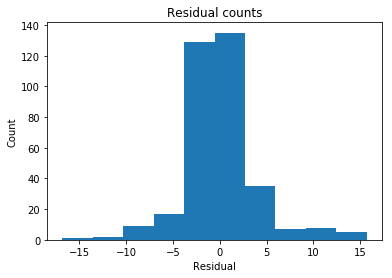

In [42]:
#Rerunning model

# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y = df['Sqrt pc'].values.reshape(-1, 1)
X = df[['Sqrt b','Robbery_2','Sqrt vc']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))

# Extract predicted values.
predicted = regr.predict(X).ravel()
actual = df['Sqrt pc']

# Calculate the error, also called the residual.
residual = actual - predicted

# 
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

# Reloading 2014 Data and Testing Residuals

In [43]:
# Import the raw data.
df = pd.read_excel('/Users/Kevin/Files/Thinkful/Data Files/NY_2014.xls', skiprows = 4)

In [44]:
df.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
0,Adams Village,1851.0,0.0,0.0,NaN,0.0,0.0,0.0,11.0,1.0,10.0,0.0,0.0
1,Addison Town and Village,2568.0,2.0,0.0,NaN,0.0,1.0,1.0,49.0,1.0,47.0,1.0,0.0
2,Afton Village4,820.0,0.0,0.0,0.0,NaN,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,Akron Village,2842.0,1.0,0.0,NaN,0.0,0.0,1.0,17.0,0.0,17.0,0.0,0.0
4,Albany4,98595.0,802.0,8.0,54.0,NaN,237.0,503.0,3888.0,683.0,3083.0,122.0,12.0


In [45]:
#stripping column names of spaces to be referenced
df.columns.str.strip()

Index(['City', 'Population', 'Violent\ncrime',
       'Murder and\nnonnegligent\nmanslaughter',
       'Rape\n(revised\ndefinition)1', 'Rape\n(legacy\ndefinition)2',
       'Robbery', 'Aggravated\nassault', 'Property\ncrime', 'Burglary',
       'Larceny-\ntheft', 'Motor\nvehicle\ntheft', 'Arson3'],
      dtype='object')

In [46]:
#renaming columns to avoid /n in name
df.columns = ['City', 'Population', 'Violent Crime',
       'Murder and Nonnegligent Manslaughter',
       'Rape (revised definition)1', 'Rape (legacy definition)2',
       'Robbery', 'Aggravated Assault', 'Property Crime', 'Burglary',
       'Larceny-Theft', 'Motor Vehicle Theft', 'Arson3']

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 376 entries, 0 to 375
Data columns (total 13 columns):
City                                    375 non-null object
Population                              369 non-null float64
Violent Crime                           369 non-null float64
Murder and Nonnegligent Manslaughter    369 non-null float64
Rape (revised definition)1              227 non-null float64
Rape (legacy definition)2               142 non-null float64
Robbery                                 369 non-null float64
Aggravated Assault                      369 non-null float64
Property Crime                          368 non-null float64
Burglary                                369 non-null float64
Larceny-Theft                           368 non-null float64
Motor Vehicle Theft                     369 non-null float64
Arson3                                  365 non-null float64
dtypes: float64(12), object(1)
memory usage: 38.3+ KB


In [48]:
#creating murder feature
df['Murder'] = np.where(df['Murder and Nonnegligent Manslaughter'] > 0, 1, 0)

In [49]:
#creating robbery feature
df['Robbery_2'] = np.where(df['Robbery'] > 0, 1, 0)

In [50]:
df.isna().sum()

City                                      1
Population                                7
Violent Crime                             7
Murder and Nonnegligent Manslaughter      7
Rape (revised definition)1              149
Rape (legacy definition)2               234
Robbery                                   7
Aggravated Assault                        7
Property Crime                            8
Burglary                                  7
Larceny-Theft                             8
Motor Vehicle Theft                       7
Arson3                                   11
Murder                                    0
Robbery_2                                 0
dtype: int64

In [51]:
df = df.dropna(subset=['Property Crime'])

In [52]:
df.isna().sum()

City                                      0
Population                                0
Violent Crime                             0
Murder and Nonnegligent Manslaughter      0
Rape (revised definition)1              142
Rape (legacy definition)2               226
Robbery                                   0
Aggravated Assault                        0
Property Crime                            0
Burglary                                  0
Larceny-Theft                             0
Motor Vehicle Theft                       0
Arson3                                    4
Murder                                    0
Robbery_2                                 0
dtype: int64

In [53]:
# Transforming feature by square rooting values.  

sr_pop = [math.sqrt(x) for x in df['Population']]
sr_vc = [math.sqrt(x) for x in df['Violent Crime']]                           
sr_mnm = [math.sqrt(x) for x in df['Murder and Nonnegligent Manslaughter']]
sr_rp = [math.sqrt(x) for x in df['Rape (legacy definition)2']]     
sr_rb = [math.sqrt(x) for x in df['Robbery']]              
sr_aa = [math.sqrt(x) for x in df['Aggravated Assault']]
sr_pc = [math.sqrt(x) for x in df['Property Crime']]                       
sr_b = [math.sqrt(x) for x in df['Burglary']]                           
sr_lt = [math.sqrt(x) for x in df['Larceny-Theft']]
sr_mvt = [math.sqrt(x) for x in df['Motor Vehicle Theft']]
                             
df['Sqrt pop'] = sr_pop
df['Sqrt vc'] = sr_vc
df['Sqrt mnm'] = sr_mnm
df['Sqrt rp'] = sr_rp
df['Sqrt rb'] = sr_rb
df['Sqrt aa'] = sr_aa
df['Sqrt pc'] = sr_pc
df['Sqrt b'] = sr_b
df['Sqrt lt'] = sr_lt
df['Sqrt mvt'] = sr_mvt

In [55]:
# Identifying Outlier
df.nlargest(5, ['Sqrt pc'])

,City,Population,Violent Crime,Murder and Nonnegligent Manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated Assault,Property Crime,Burglary,...,Sqrt pop,Sqrt vc,Sqrt mnm,Sqrt rp,Sqrt rb,Sqrt aa,Sqrt pc,Sqrt b,Sqrt lt,Sqrt mvt
227,New York4,8473938.0,50564.0,333.0,2190.0,NaN,16581.0,31460.0,135747.0,15916.0,...,2911.002920,224.864404,18.248288,NaN,128.767232,177.369670,368.438597,126.158630,334.823834,87.886290
38,Buffalo4,258419.0,3174.0,60.0,174.0,NaN,1277.0,1663.0,12449.0,3119.0,...,508.349289,56.338264,7.745967,NaN,35.735137,40.779897,111.575087,55.848008,91.443972,31.112698
283,Rochester4,210347.0,1765.0,27.0,190.0,NaN,698.0,850.0,8856.0,2125.0,...,458.636021,42.011903,5.196152,NaN,26.419690,29.154759,94.106323,46.097722,77.833155,25.942244
326,Syracuse4,144534.0,1164.0,20.0,70.0,NaN,406.0,668.0,5755.0,1404.0,...,380.176275,34.117444,4.472136,NaN,20.149442,25.845696,75.861716,37.469988,63.134776,19.104973
4,Albany4,98595.0,802.0,8.0,54.0,NaN,237.0,503.0,3888.0,683.0,...,313.998408,28.319605,2.828427,NaN,15.394804,22.427661,62.353829,26.134269,55.524769,11.045361


In [56]:
#dropping NYC
df = df.drop(df.index[227])

In [57]:
# Check
df.nlargest(5, ['Sqrt pc'])

,City,Population,Violent Crime,Murder and Nonnegligent Manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated Assault,Property Crime,Burglary,...,Sqrt pop,Sqrt vc,Sqrt mnm,Sqrt rp,Sqrt rb,Sqrt aa,Sqrt pc,Sqrt b,Sqrt lt,Sqrt mvt
38,Buffalo4,258419.0,3174.0,60.0,174.0,NaN,1277.0,1663.0,12449.0,3119.0,...,508.349289,56.338264,7.745967,NaN,35.735137,40.779897,111.575087,55.848008,91.443972,31.112698
283,Rochester4,210347.0,1765.0,27.0,190.0,NaN,698.0,850.0,8856.0,2125.0,...,458.636021,42.011903,5.196152,NaN,26.419690,29.154759,94.106323,46.097722,77.833155,25.942244
326,Syracuse4,144534.0,1164.0,20.0,70.0,NaN,406.0,668.0,5755.0,1404.0,...,380.176275,34.117444,4.472136,NaN,20.149442,25.845696,75.861716,37.469988,63.134776,19.104973
4,Albany4,98595.0,802.0,8.0,54.0,NaN,237.0,503.0,3888.0,683.0,...,313.998408,28.319605,2.828427,NaN,15.394804,22.427661,62.353829,26.134269,55.524769,11.045361
57,Cheektowaga Town4,78209.0,202.0,1.0,25.0,NaN,66.0,110.0,2699.0,300.0,...,279.658721,14.212670,1.000000,NaN,8.124038,10.488088,51.951901,17.320508,48.207883,8.660254


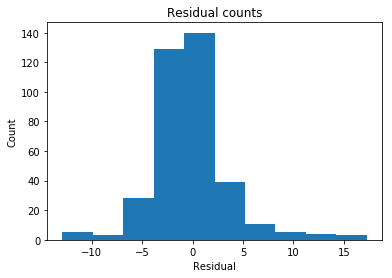

In [60]:
predicted = 1.25393516 * df['Sqrt b'] + 2.80091406 * df['Robbery_2'] + 0.87733659 * df['Sqrt vc'] + 2.02697147
actual = df['Sqrt pc']

# Calculate the error, also called the residual.
residual = actual - predicted

plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

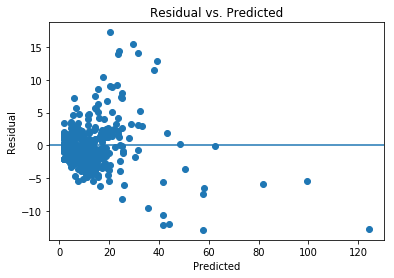

In [61]:
#Residual Plot
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

Using the new model from the 2013 data, the residuals are much closer around 0 when using the 2014 dataset to test compared to the original model. 